No handles with labels found to put in legend.


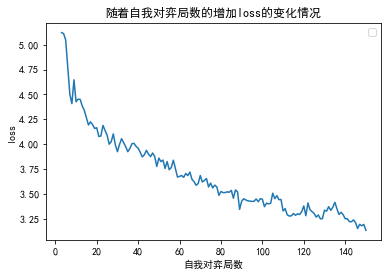

No handles with labels found to put in legend.


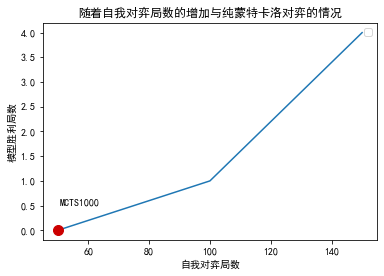

0

In [1]:
'''
与print_figure.py文件功能类似, 都是用来画图的. 通过每行的contains方法分开 loss_list与win_list
'''
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签



def is_number(str):
    try:

        if str == 'NaN':
            return False
        float(str)
        return True
    except ValueError:
        return False

# z中文 能否用
#f = open('a1_test.log') # ����

f = open('loss_win - 副本.log') #

lines = f.readlines()  # ���ڴ��
loss_list = []
win_list = []

for line in lines:
    line = line.strip('\n')
    if line.__contains__("win"):
        num = list(map(str, line.split(" ")))
        for i, value in enumerate(num):
            if not is_number(value):
                num.pop(i)
            else:
                value = float(value)
        num = np.array(num)
        num = num.astype(np.float64)
        win_list.append(num)
        #win_list.append(num.tolist())
    else:
        num = list(map(str, line.split(" ")))
        for i, value in enumerate(num):
            if not is_number(value):
                num.pop(i)
            else:
                value = float(value)
        num = np.array(num)
        num = num.astype(np.float64)
        loss_list.append(num)
        #loss_list.append(num.tolist())

loss_list = np.array(loss_list)
win_list = np.array(win_list)

# 绘图
plt.grid(True)  # 显示背景的网格线
plt.grid(linestyle="-", linewidth=0.5)  # 设置背景网格线的样式

# (1，绘制Loss
def draw_loss():
    plt.plot(loss_list[:, 0], loss_list[:, 1])  # 绘图
    plt.legend(loc=0)  # 右上角图例
    plt.xlabel('自我对弈局数')
    plt.ylabel("loss")
    plt.title('随着自我对弈局数的增加loss的变化情况')
    plt.show()
    return 0

# (2，绘制胜率
def draw_win():
    index = 0
    plt.plot(win_list[:, 0], win_list[:, 2]) # 绘制完整曲线
    x0 = win_list[:, 0][0]
    y0 = win_list[:, 2][0]
    plt.plot(x0, y0, 'ro',markersize=10.,color=(0.8,0.,0.)) # 绘制起始点
    plt.annotate("MCTS" + str(int(win_list[:, 1][0])), xy = (x0, y0), xytext = (x0 + 0.5, y0 + 0.5))
    for i in win_list:
        if i[1] > win_list[index-1][1]:
            plt.plot(i[0], i[2], 'ro',markersize=10.,color=(0.8,0.,0.)) # 绘制mcts次数增加拐点
            plt.annotate("MCTS" + str(int(i[1])), xy = (i[0], i[2]), xytext = (i[0]+0.5, i[2]+0.5))
        index = index + 1
    plt.xlabel('自我对弈局数')
    plt.ylabel("模型胜利局数")
    plt.title('随着自我对弈局数的增加与纯蒙特卡洛对弈的情况')
    plt.legend(loc=0)  # 右上角图例
    plt.show()
    return 0

# 此处调用绘图函数
draw_loss()
draw_win()
